In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import csv
from pathlib import Path
import numpy as np
%matplotlib inline

In [2]:
#Import tha relevant alpha vantage libraries
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies

In [3]:
#Import tha required libraries for datapreparation and analysis
import sklearn
import numpy as np
import seaborn as sns

In [ ]:
#Import Required modules for Linear Regression
Import Train Test Split
from sklearn.model_selection import train_test_split

# Import Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Import different Models -  1. linera_model - LogisticRegression
#Import different Models -  5. svm - LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
#from sklearn.preprocessing import GetDummies
from sklearn.linear_model import LogisticRegression

In [111]:
#set key
key = '32UEEELX55R5WBXX'
start_date = '2015-04-01' 

## Alpha_vantage for downloading stock data

In [112]:
#Alpha_Vantage API for stocks
#Instantiate API connection
ts = TimeSeries (key, output_format='pandas')

In [113]:
"""Return monthly time series in two json objects as data and meta_data. It raises ValueError when problems arise
Keyword Arguments: 
symbol:  the symbol for the equity we want to get its data"""
def get_monthly_adjusted(self, symbol):
    _FUNCTION_KEY = "TIME_SERIES_MONTHLY_ADJUSTED"
    return _FUNCTION_KEY, 'Time Series (Monthly)', 'Meta Data'

In [114]:
Tickers = ['AAPL', 'CRM']
print (Tickers)

['AAPL', 'CRM']


In [115]:
stk_df = {}
df = pd.DataFrame(columns=Tickers)
for ticker in Tickers:
    data2, meta = ts.get_monthly_adjusted(ticker)
    stk_df.update({ticker:(data2.iloc[:,4])})

In [129]:
#Need to convert this into Month and Year so the feature can be consolidated with inflation data that is provided at the end of the month
stocks_df = pd.DataFrame(stk_df)
stocks_df.index = pd.to_datetime(stocks_df.index, infer_datetime_format = True)
stocks_df = stocks_df[stocks_df.index > start_date]
print(stocks_df)   

                AAPL     CRM
date                        
2015-04-30   28.3992   72.82
2015-05-29   29.6860   72.75
2015-06-30   28.5798   69.63
2015-07-31   27.6398   73.30
2015-08-31   25.8099   69.36
...              ...     ...
2021-12-31  177.3437  254.13
2022-01-31  174.5572  232.63
2022-02-28  165.1200  210.53
2022-03-31  174.6100  212.32
2022-04-14  165.2900  189.41

[85 rows x 2 columns]


## Alpha_vantage for downloading S&P 500 stock data

In [117]:
SPTicker = ['SPY']

In [118]:
sp_stk_df = {}
sp_df = pd.DataFrame(columns=SPTicker)
for spticker in SPTicker:
    spdata, meta = ts.get_monthly_adjusted(spticker)
    sp_stk_df.update({spticker:(spdata.iloc[:,4])})

In [119]:
#Need to convert this into Month and Year so the feature can be consolidated with inflation data that is provided at the end of the month
sp_stocks_df = pd.DataFrame(sp_stk_df)
sp_stocks_df.index = pd.to_datetime(sp_stocks_df.index, infer_datetime_format = True)
sp_stocks_df = sp_stocks_df[sp_stocks_df.index > start_date]
print(sp_stocks_df)

                 SPY
date                
2022-04-14  437.7900
2022-03-31  451.6400
2022-02-28  435.2923
2022-01-31  448.5317
2021-12-31  473.5049
...              ...
2015-08-31  174.3680
2015-07-31  185.7636
2015-06-30  181.7385
2015-05-29  185.4664
2015-04-30  183.1123

[85 rows x 1 columns]


## Alpha_vantage for downloading Treasury Yields

In [120]:
#Getting Treasury Yield for 5 year treasury stock
#Need to convert this into Month and Year so the feature can be consolidated with stock data that is provided at the end of the month
url = f'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=monthly&maturity=5year&apikey={key}'
r = requests.get(url)
data = r.json()
TYield = pd.DataFrame(data['data'])
TYield.index = TYield['date']
TYield = TYield.drop(TYield.columns[[0]], axis=1)
TYield.index = pd.to_datetime(TYield.index, infer_datetime_format = True)
TYield = TYield[TYield.index > start_date]
TYield

,value
date,
2022-03-01,2.11
2022-02-01,1.81
2022-01-01,1.54
2021-12-01,1.23
2021-11-01,1.20
...,...
2015-09-01,1.49
2015-08-01,1.54
2015-07-01,1.63


## Alpha_vantage for Inflation Expectation

In [122]:
#Getting Inflation Expectation 
#Taking Inflation expectation and not inflation data because only the expectation is available on a monthly basis, while the inflation data available is annual
#need to be converted to month and time
url = f'https://www.alphavantage.co/query?function=INFLATION_EXPECTATION&apikey={key}'
r = requests.get(url)
data = r.json()
InflationExp = pd.DataFrame(data['data'])
InflationExp.index = InflationExp['date']
InflationExp = InflationExp.drop(InflationExp.columns[[0]], axis=1)
InflationExp.index  = pd.to_datetime(InflationExp.index, infer_datetime_format = True)
InflationExp = InflationExp[InflationExp.index > start_date]
InflationExp


,value
date,
2022-02-01,4.9
2022-01-01,4.9
2021-12-01,4.8
2021-11-01,4.9
2021-10-01,4.8
...,...
2015-09-01,2.8
2015-08-01,2.8
2015-07-01,2.8


## Alpha_vantage for Consumer Sentiment

In [123]:
#Getting Consumer Sentiment
url = f'https://www.alphavantage.co/query?function=CONSUMER_SENTIMENT&apikey={key}'
r = requests.get(url)
data = r.json()
Sentiment = pd.DataFrame(data['data'])
Sentiment.index = Sentiment['date']
Sentiment = Sentiment.drop(Sentiment.columns[[0]], axis=1)
Sentiment.index = pd.to_datetime(Sentiment.index, infer_datetime_format = True)
Sentiment = Sentiment[Sentiment.index > start_date]
Sentiment

,value
date,
2022-02-01,62.8
2022-01-01,67.2
2021-12-01,70.6
2021-11-01,67.4
2021-10-01,71.7
...,...
2015-09-01,87.2
2015-08-01,91.9
2015-07-01,93.1


## Alpha_vantage for EPS Download

In [125]:
#df = pd.DataFrame(columns=Tickers)
eps_df = {}
reps = pd.DataFrame()
for ticker in Tickers:
    url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol=IBM&apikey={key}'
    r = requests.get(url)
    data = r.json()
    Ticker1 = pd.DataFrame(data['quarterlyEarnings'])
    Ticker1.index = Ticker1['fiscalDateEnding']
    Ticker1 = Ticker1.drop(Ticker1.columns[[0,1,3,4,5]], axis=1)
    Ticker1.rename(columns={"reportedEPS":ticker},inplace=True)
    eps_df.update(Ticker1)
REPS_df = pd.DataFrame(eps_df)
REPS_df.index = pd.to_datetime(REPS_df.index, infer_datetime_format = True)
REPS_df = REPS_df[REPS_df.index > start_date]
REPS_df 

,AAPL,CRM
fiscalDateEnding,,
2021-12-31,3.35,3.35
2021-09-30,2.52,2.52
2021-06-30,2.33,2.33
2021-03-31,1.77,1.77
2020-12-31,2.07,2.07
2020-09-30,2.58,2.58
2020-06-30,2.18,2.18
2020-03-31,1.84,1.84
2019-12-31,4.71,4.71


## Alpha_vantage for Interest Rate

In [128]:
## Federal Interest Rate (Monthly)
##How to use it as this is available only on a quarterly basis
url = 'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey=demo'
r = requests.get(url)
data = r.json()
Interest_Rate = pd.DataFrame(data['data'])
Interest_Rate.index = Interest_Rate['date']
Interest_Rate = Interest_Rate.drop(Interest_Rate.columns[[0]], axis=1)
Interest_Rate.index = pd.to_datetime(Interest_Rate.index, infer_datetime_format = True)
Interest_Rate = Interest_Rate[Interest_Rate.index > start_date]
Interest_Rate

,value
date,
2022-03-01,0.20
2022-02-01,0.08
2022-01-01,0.08
2021-12-01,0.08
2021-11-01,0.08
...,...
2015-09-01,0.14
2015-08-01,0.14
2015-07-01,0.13


## Alpha_vantage for Unemployment Rates

In [126]:
#Getting Unemployment Rates
url = f'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=demo{key}'
r = requests.get(url)
data = r.json()
Unemployment = pd.DataFrame(data['data'])
Unemployment.index = Unemployment['date']
Unemployment = Unemployment.drop(Unemployment.columns[[0]], axis=1)
Unemployment.index = pd.to_datetime(Unemployment.index, infer_datetime_format = True)
Unemployment = Unemployment[Unemployment.index > start_date]
Unemployment

,value
date,
2022-03-01,3.6
2022-02-01,3.8
2022-01-01,4.0
2021-12-01,3.9
2021-11-01,4.2
...,...
2015-09-01,5.0
2015-08-01,5.1
2015-07-01,5.2


# Dataset_Preliminary

## Modify the feature dataframes to have a consistent date format and comsolidate them into one file
- Treasury Yields: TYield : treasury_yield 
- Inflation Expectation: InflationExp: inflation_expect
- S&P 500 Correlation: sp_stocks_df : sp_500
- Unemployment Rate: Unemployment : unemployment_rate
- Consumer Sentiments: Sentiment : consumer_sentiment

In [130]:
#Convert the Treasury yields into Month and Year format for conatenating with other dataframes
treasury_yield = TYield.copy()
treasury_yield = treasury_yield.sort_values(by=['date'], ascending=True)
treasury_yield['value'] = treasury_yield['value'].astype(float)
treasury_yield['value'] = treasury_yield.pct_change(periods=1)
treasury_yield = treasury_yield.reset_index()
treasury_yield['date'] = treasury_yield['date'].dt.to_period('M')
treasury_yield.set_index('date', inplace = True)
treasury_yield.rename(columns={"value": "treausry_yield"}, inplace = True)
treasury_yield

,treausry_yield
date,
2015-05,NaN
2015-06,0.090909
2015-07,-0.029762
2015-08,-0.055215
2015-09,-0.032468
...,...
2021-11,0.081081
2021-12,0.025000
2022-01,0.252033


In [131]:
#Convert the inflation expectation into Month and Year format for conatenating with other dataframes
inflation_expect = InflationExp.copy()
inflation_expect = inflation_expect.sort_values(by=['date'], ascending=True)
inflation_expect['value'] = inflation_expect['value'].astype(float)
inflation_expect['value'] = inflation_expect.pct_change(periods=1)
inflation_expect = inflation_expect.reset_index()
inflation_expect['date'] = inflation_expect['date'].dt.to_period('M')
inflation_expect.set_index('date', inplace = True)
inflation_expect.rename(columns={"value": "inflation_expectation"}, inplace = True)
inflation_expect

,inflation_expectation
date,
2015-05,NaN
2015-06,-0.035714
2015-07,0.037037
2015-08,0.000000
2015-09,0.000000
...,...
2021-10,0.043478
2021-11,0.020833
2021-12,-0.020408


In [132]:
#Convert the S&P 500 into Month and Year format for conatenating with other dataframes

sp_500 = sp_stocks_df.copy()
sp_500 = sp_500.sort_values(by=['date'], ascending=True)
sp_500['SPY'] = sp_500.pct_change(periods=1)
sp_500 = sp_500.reset_index()
sp_500['date'] = sp_500['date'].dt.to_period('M')
sp_500.set_index('date', inplace = True)
sp_500.rename(columns={"SPY": "sp500_return"}, inplace = True)
sp_500

,sp500_return
date,
2015-04,NaN
2015-05,0.012856
2015-06,-0.020100
2015-07,0.022148
2015-08,-0.061345
...,...
2021-12,0.046288
2022-01,-0.052741
2022-02,-0.029517


In [133]:
#Convert the Unemployment rate into Month and Year format for concatenating with other dataframes
unemployment_rate = Unemployment.copy()
unemployment_rate = unemployment_rate.sort_values(by=['date'], ascending=True)
unemployment_rate['value'] = unemployment_rate['value'].astype(float)
unemployment_rate['value'] = unemployment_rate.pct_change(periods=1)
unemployment_rate = unemployment_rate.reset_index()
unemployment_rate['date'] = unemployment_rate['date'].dt.to_period('M')
unemployment_rate.set_index('date', inplace = True)
unemployment_rate.rename(columns={"value": "unemployment_rate"}, inplace = True)
unemployment_rate

,unemployment_rate
date,
2015-05,NaN
2015-06,-0.053571
2015-07,-0.018868
2015-08,-0.019231
2015-09,-0.019608
...,...
2021-11,-0.086957
2021-12,-0.071429
2022-01,0.025641


In [134]:
#Convert the Consumer Sentiment into Month and Year format for concatenating with other dataframes
consumer_sentiment = Sentiment.copy()
consumer_sentiment.replace('.', np.NaN, inplace=True)
consumer_sentiment = consumer_sentiment.sort_values(by=['date'], ascending=True)
consumer_sentiment = consumer_sentiment.dropna()
consumer_sentiment['value'] = consumer_sentiment['value'].astype(float)
consumer_sentiment['value'] = consumer_sentiment.pct_change(periods=1)
consumer_sentiment = consumer_sentiment.reset_index()
consumer_sentiment['date'] = consumer_sentiment['date'].dt.to_period('M')
consumer_sentiment.set_index('date', inplace = True)
consumer_sentiment.rename(columns={"value": "consumer_sentiment"}, inplace = True)
consumer_sentiment

,consumer_sentiment
date,
2015-05,NaN
2015-06,0.059537
2015-07,-0.031217
2015-08,-0.012889
2015-09,-0.051143
...,...
2021-10,-0.015110
2021-11,-0.059972
2021-12,0.047478


In [135]:
macro_features = pd.concat([treasury_yield, inflation_expect, sp_500, unemployment_rate, consumer_sentiment], axis=1, join='inner')

In [136]:
macro_features.dropna(inplace=True)
macro_features

,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment
date,,,,,
2015-06,0.090909,-0.035714,-0.020100,-0.053571,0.059537
2015-07,-0.029762,0.037037,0.022148,-0.018868,-0.031217
2015-08,-0.055215,0.000000,-0.061345,-0.019231,-0.012889
2015-09,-0.032468,0.000000,-0.024990,-0.019608,-0.051143
2015-10,-0.067114,-0.035714,0.085286,0.000000,0.032110
...,...,...,...,...,...
2021-10,0.290698,0.043478,0.070164,-0.021277,-0.015110
2021-11,0.081081,0.020833,-0.008035,-0.086957,-0.059972
2021-12,0.025000,-0.020408,0.046288,-0.071429,0.047478


In [137]:
#Need to convert this into Month and Year so the feature can be consolidated with inflation data that is provided at the end of the month
stocks_df  
stocks_dataframe = stocks_df.copy()  
stocks_dataframe.dropna(inplace=True)
stocks_dataframe = stocks_dataframe.reset_index()
stocks_dataframe['date'] = stocks_dataframe['date'].dt.to_period('M')
stocks_dataframe.set_index('date', inplace = True)
stocks_dataframe

,AAPL,CRM
date,,
2015-04,28.3992,72.82
2015-05,29.6860,72.75
2015-06,28.5798,69.63
2015-07,27.6398,73.30
2015-08,25.8099,69.36
...,...,...
2021-12,177.3437,254.13
2022-01,174.5572,232.63
2022-02,165.1200,210.53


In [138]:
REPS_df

,AAPL,CRM
fiscalDateEnding,,
2021-12-31,3.35,3.35
2021-09-30,2.52,2.52
2021-06-30,2.33,2.33
2021-03-31,1.77,1.77
2020-12-31,2.07,2.07
2020-09-30,2.58,2.58
2020-06-30,2.18,2.18
2020-03-31,1.84,1.84
2019-12-31,4.71,4.71


In [139]:
#Need to convert this into Month and Year so the feature can be consolidated with inflation data that is provided at the end of the month
REPS_df  
EPS_dataframe = REPS_df.copy()  
EPS_dataframe.dropna(inplace=True)
EPS_dataframe.replace('.', np.NaN, inplace=True)
EPS_dataframe = EPS_dataframe.sort_values(by=['fiscalDateEnding'], ascending=True)
EPS_dataframe = EPS_dataframe.dropna()
for ticker in Tickers:
    EPS_dataframe[ticker] = EPS_dataframe[ticker].astype(float)
EPS_dataframe = EPS_dataframe.pct_change(periods=1)
EPS_dataframe.dropna(inplace=True)
EPS_dataframe = EPS_dataframe.reset_index()
EPS_dataframe['fiscalDateEnding'] = EPS_dataframe['fiscalDateEnding'].dt.to_period('M')
EPS_dataframe.set_index('fiscalDateEnding', inplace = True)
EPS_dataframe




,AAPL,CRM
fiscalDateEnding,,
2015-09,-0.130208,-0.130208
2015-12,0.449102,0.449102
2016-03,-0.514463,-0.514463
2016-06,0.255319,0.255319
2016-09,0.115254,0.115254
2016-12,0.522796,0.522796
2017-03,-0.524950,-0.524950
2017-06,0.247899,0.247899
2017-09,0.111111,0.111111


## ML Model

In [140]:
ticker = pd.concat([macro_features, stocks_dataframe['AAPL'],EPS_dataframe['AAPL']], axis=1, join='outer')
ticker.tail(50)

,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment,AAPL,AAPL
2018-03,0.011538,0.037037,-0.027416,-0.024390,0.017051,40.2254,-0.527027
2018-04,0.026616,-0.035714,0.005168,0.000000,-0.025641,39.6212,NaN
2018-05,0.044444,0.037037,0.024309,-0.050000,-0.008097,44.9756,NaN
2018-06,-0.014184,0.071429,0.005755,0.052632,0.002041,44.5521,0.257143
2018-07,0.000000,-0.033333,0.037047,-0.050000,-0.003055,45.7988,NaN
2018-08,-0.003597,0.034483,0.031920,0.000000,-0.017365,54.9784,NaN
2018-09,0.043321,-0.100000,0.005948,-0.026316,0.040541,54.5219,0.110390
2018-10,0.038062,0.074074,-0.069104,0.027027,-0.014985,52.8603,NaN
2018-11,-0.016667,-0.034483,0.018549,0.000000,-0.011156,43.2826,NaN
2018-12,-0.091525,-0.035714,-0.087936,0.026316,0.008205,38.2316,0.423977


In [141]:
ticker_corr = ticker.corr()
ticker_corr

,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment,AAPL,AAPL
treausry_yield,1.000000,-0.033048,0.141788,-0.344071,0.442008,0.263185,0.139952
inflation_expectation,-0.033048,1.000000,0.075912,-0.095480,-0.225557,0.131208,-0.059232
sp500_return,0.141788,0.075912,1.000000,0.240568,-0.072381,0.088246,0.170068
unemployment_rate,-0.344071,-0.095480,0.240568,1.000000,-0.481669,-0.047396,-0.244089
consumer_sentiment,0.442008,-0.225557,-0.072381,-0.481669,1.000000,-0.113900,0.153025
AAPL,0.263185,0.131208,0.088246,-0.047396,-0.113900,1.000000,0.071337
AAPL,0.139952,-0.059232,0.170068,-0.244089,0.153025,0.071337,1.000000


<AxesSubplot:>

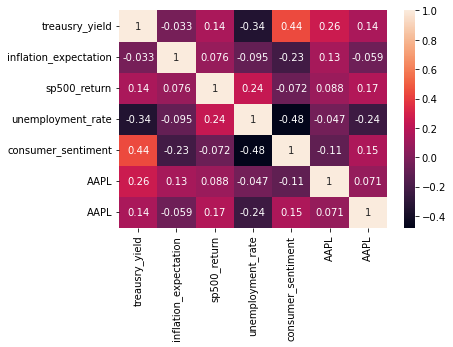

In [142]:
sns.heatmap(ticker_corr, annot=True)